In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 300

In [22]:
y2015 = pd.read_csv('LoanStats.csv', skipinitialspace=True, header=1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [24]:
categorical = y2015.select_dtypes(include=['object']) #this is pulling the name of all columns where the type is object?
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
12
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [25]:
#converting ID and Interest Rate to numerical data
y2015['id'] = pd.to_numeric(y2015['id'], errors = 'coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors = 'coerce')

#drop other columns with a lot of unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [26]:
#removing two rows at end with NaN summary data
y2015 = y2015[:-2]

In [27]:
pd.get_dummies(y2015) #Why do we do this? Is it only doing it for categorical columns?

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.00,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.00,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.00,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.00,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.00,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,64000.00,18.28,0.0,...,0,0,0,0,0,1,0,0,0,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,65000.00,21.77,0.0,...,0,0,0,0,0,1,0,0,0,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,112000.00,8.68,0.0,...,0,0,0,0,0,1,0,0,0,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,110000.00,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,104433.00,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1) #What is this 1 for?
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)#if this was axis=0 would it drop all rows with an NA value?

cross_val_score(rfc, X, Y, cv=5) #shouldn't we do an rfc.fit(X,Y) or something first?

array([ 0.9575759 ,  0.98050344,  0.8208739 ,  0.82007409,  0.97846015])

In [29]:
model = rfc.fit(X,Y)

In [30]:
col_lst = list(X.columns)

In [31]:
col_lst

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 't

In [32]:
x = zip(col_lst, list(model.feature_importances_))

In [33]:
feat_list = []
for i in x:
    feat_list.append(i)

In [34]:
feat_list

[('id', 0.0037683961348295367),
 ('member_id', 0.0037984542937457753),
 ('loan_amnt', 0.0074020630265096187),
 ('funded_amnt', 0.011932778153702587),
 ('funded_amnt_inv', 0.012159444930406582),
 ('int_rate', 0.0044424979901251686),
 ('installment', 0.0081858193454322267),
 ('annual_inc', 0.0019467687141380562),
 ('dti', 0.0027485370014155358),
 ('delinq_2yrs', 0.00055376523274837581),
 ('inq_last_6mths', 0.00065641386745725501),
 ('open_acc', 0.0012433452545944133),
 ('pub_rec', 0.00036452724229276069),
 ('revol_bal', 0.0026442806736817525),
 ('total_acc', 0.0016177463111320327),
 ('out_prncp', 0.09282270971604667),
 ('out_prncp_inv', 0.22994814031949623),
 ('total_pymnt', 0.021835486596742511),
 ('total_pymnt_inv', 0.035390569756126235),
 ('total_rec_prncp', 0.058098499594850896),
 ('total_rec_int', 0.010212319576204398),
 ('total_rec_late_fee', 0.0022611852840088687),
 ('recoveries', 0.0073738990044163455),
 ('collection_recovery_fee', 0.011820235337873056),
 ('last_pymnt_amnt', 0.08

In [35]:
feat_dict = {}
for i in feat_list:
    feat_dict[i[0]] = i[1]

In [36]:
import operator
sorted_feats = sorted(feat_dict.items(), key=operator.itemgetter(1))

In [37]:
sorted_feats

[('last_credit_pull_d_Feb-2015', 0.0),
 ('title_Student Loan', 0.0),
 ('last_credit_pull_d_Apr-2015', 0.0),
 ('title_Paying off higher interest cards & auto', 0.0),
 ('title_SAVE', 0.0),
 ('home_ownership_ANY', 0.0),
 ('purpose_wedding', 0.0),
 ('last_pymnt_d_Feb-2015', 0.0),
 ('title_Pay off Lowes Card', 0.0),
 ('last_credit_pull_d_Mar-2015', 0.0),
 ('title_Credit Card/Auto Repair', 0.0),
 ('last_pymnt_d_Jan-2015', 0.0),
 ('title_New Baby and New House (CC Consolidate)', 0.0),
 ('last_credit_pull_d_Jan-2015', 0.0),
 ('title_new kitchen for momma!', 0.0),
 ('title_odymeds', 0.0),
 ('title_new day', 0.0),
 ('title_Simple Loan Until Contract Is Completed', 0.0),
 ('last_credit_pull_d_Dec-2014', 0.0),
 ('purpose_educational', 0.0),
 ('title_considerate', 0.0),
 ('policy_code', 0.0),
 ('title_Trying to come back to reality!', 0.0),
 ('pymnt_plan_n', 0.0),
 ('title_DebtC', 0.0),
 ('title_Learning and training', 0.0),
 ('last_pymnt_d_Mar-2015', 7.4776272713903708e-08),
 ('last_credit_pull_d_

Lots of features providing zero usefulness out there, we can drop those right away

In [41]:
X.head()

,funded_amnt,funded_amnt_inv,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,collection_recovery_fee,last_pymnt_amnt,last_pymnt_d_Dec-2016,last_pymnt_d_Jan-2017,last_pymnt_d_Nov-2016,last_pymnt_d_Oct-2016,last_pymnt_d_Sep-2016,next_pymnt_d_Feb-2017,last_credit_pull_d_Jan-2017
0,16000.0,16000.0,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,379.39,0,1,0,0,0,0,1
1,9600.0,9600.0,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,298.58,0,1,0,0,0,0,1
2,25000.0,25000.0,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,20807.39,0,0,0,0,1,0,1
3,28000.0,28000.0,19263.77,19263.77,10271.36,10271.36,8736.23,1535.13,0.0,858.05,0,1,0,0,0,0,1
4,8650.0,8650.0,0.00,0.00,9190.49,9190.49,8650.00,540.49,0.0,8251.42,0,0,0,0,0,0,0


In [39]:
# This loop has to run on X, not on y2015 since X has the dummy columns that are useless
# Removing all features that had a 0.0 score
for i in sorted_feats:
    if i[1] < 0.01:     
        X.drop(i[0], axis=1, inplace=True)

In [43]:
rfc2 = ensemble.RandomForestClassifier()
cross_val_score(rfc2, X, Y, cv=10)

array([ 0.9691767 ,  0.97444848,  0.97777303,  0.9812638 ,  0.97081453,
        0.97618143,  0.97501722,  0.97865064,  0.9733536 ,  0.98116658])

In [42]:
X.head()

,funded_amnt,funded_amnt_inv,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,collection_recovery_fee,last_pymnt_amnt,last_pymnt_d_Dec-2016,last_pymnt_d_Jan-2017,last_pymnt_d_Nov-2016,last_pymnt_d_Oct-2016,last_pymnt_d_Sep-2016,next_pymnt_d_Feb-2017,last_credit_pull_d_Jan-2017
0,16000.0,16000.0,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,379.39,0,1,0,0,0,0,1
1,9600.0,9600.0,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,298.58,0,1,0,0,0,0,1
2,25000.0,25000.0,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,20807.39,0,0,0,0,1,0,1
3,28000.0,28000.0,19263.77,19263.77,10271.36,10271.36,8736.23,1535.13,0.0,858.05,0,1,0,0,0,0,1
4,8650.0,8650.0,0.00,0.00,9190.49,9190.49,8650.00,540.49,0.0,8251.42,0,0,0,0,0,0,0


Well that looks better, by my count, I dropped 185 features and it seems I'm able to get a pretty consistent cross val rating.

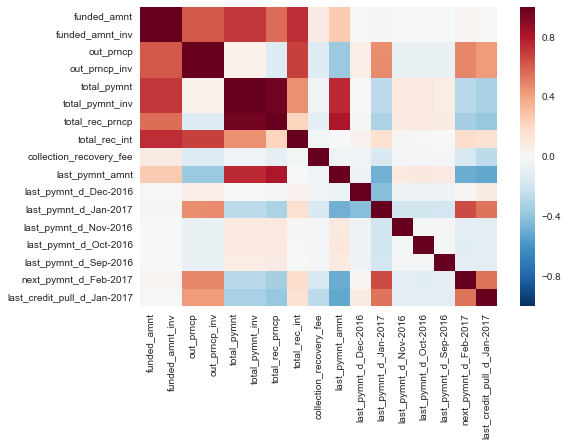

In [44]:
import seaborn as sns
sns.heatmap(X.corr())

While I am happy with the scores above, it definitely seems like some PCA would be useful in this situation.